In [124]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px;
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error





In [125]:
df  = pd.read_csv("zomato_stock_data.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       698 non-null    object 
 1   Open       698 non-null    float64
 2   High       698 non-null    float64
 3   Low        698 non-null    float64
 4   Close      698 non-null    float64
 5   Adj Close  698 non-null    float64
 6   Volume     698 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 38.3+ KB


In [127]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


In [128]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02
mean,98.334384,100.335100,96.009026,98.047851,98.047851,6.630727e+07
std,40.592932,41.323650,39.612367,40.518441,40.518441,7.209595e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,63.062499,64.224998,62.000000,62.887498,62.887498,2.981124e+07
50%,83.599998,85.549999,82.200001,83.900002,83.900002,4.708161e+07
75%,133.637497,135.687500,131.225002,133.250004,133.250004,7.465835e+07
max,205.800003,207.199997,194.500000,201.300003,201.300003,6.948953e+08


Stock price Progression

In [129]:
#stock price progession
fig.update_layout(
    title="Stock Price Progression Over Time",
    xaxis_title="Date",
    yaxis_title="Stock Price"
)
#plot
fig = px.line(df, x = "Date", y=df.columns[1:-2])
fig.show()
 
#change the format to date time
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print(df["Date"])





0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


In [130]:

def plot_stock_price(df, start_date, end_date):
    # Change the format to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    
    # Filter the DataFrame for the specified date range
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    filtered_df = df.loc[mask]
    
    # Create the line chart
    fig = px.line(filtered_df, x="Date", y=filtered_df.columns[1:-2])
    
    # Update layout with titles
    fig.update_layout(
        title="Stock Price Progression Over Time",
        xaxis_title="Date",
        yaxis_title="Stock Price"
    )
    
    # Show the plot
    fig.show()

# Example usage:
# Assuming df is your DataFrame and you want to visualize data from 1st July 2024 to 15th July 2024
start_date = '2024-07-01'
end_date = '2024-07-15'
plot_stock_price(df, start_date, end_date)

PLOTING FOR CLOSING VALUES

0      126.000000
1      140.649994
2      132.899994
3      131.199997
4      141.550003
          ...    
693    192.000000
694    195.199997
695    194.850006
696    189.100006
697    185.500000
Name: Close, Length: 698, dtype: float64
0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


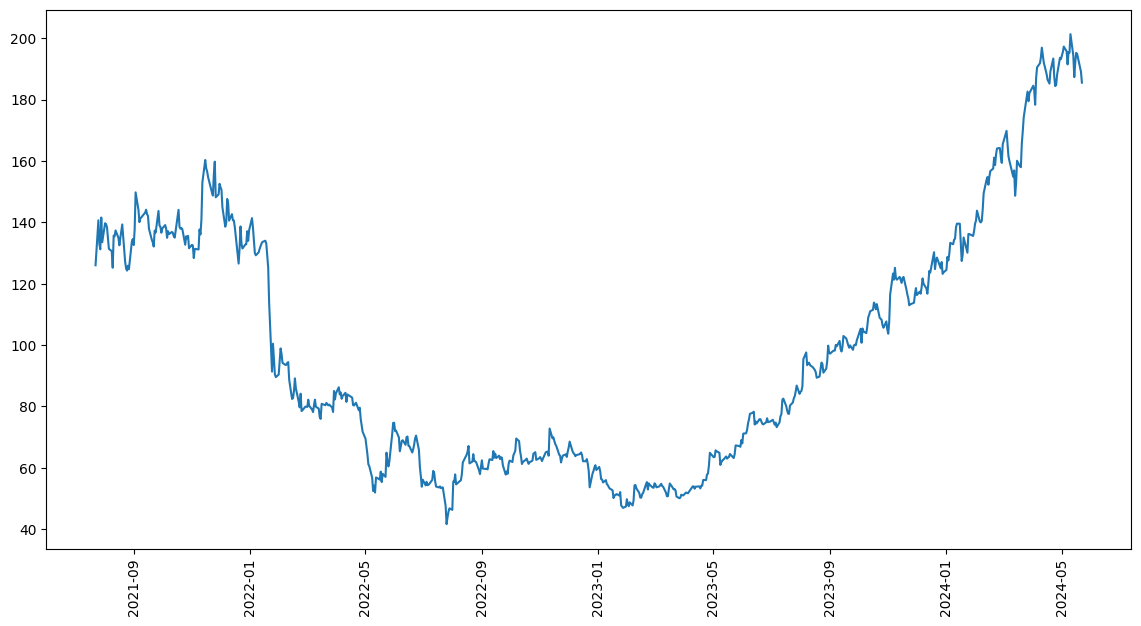

In [131]:
y = df["Close"]
print(y)

x = df["Date"]
print(x)

plt.figure(figsize=(14, 7))
plt.plot(x, y)
#plt.xlabel("Date")
#plt.ylabel("Closing Prices")
plt.xticks(rotation = 90)
plt.show()

PLOTING FOR OPENING VALUES


0      116.000000
1      126.349998
2      141.699997
3      131.000000
4      134.949997
          ...    
693    188.800003
694    192.899994
695    195.149994
696    194.399994
697    190.000000
Name: Open, Length: 698, dtype: float64
0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


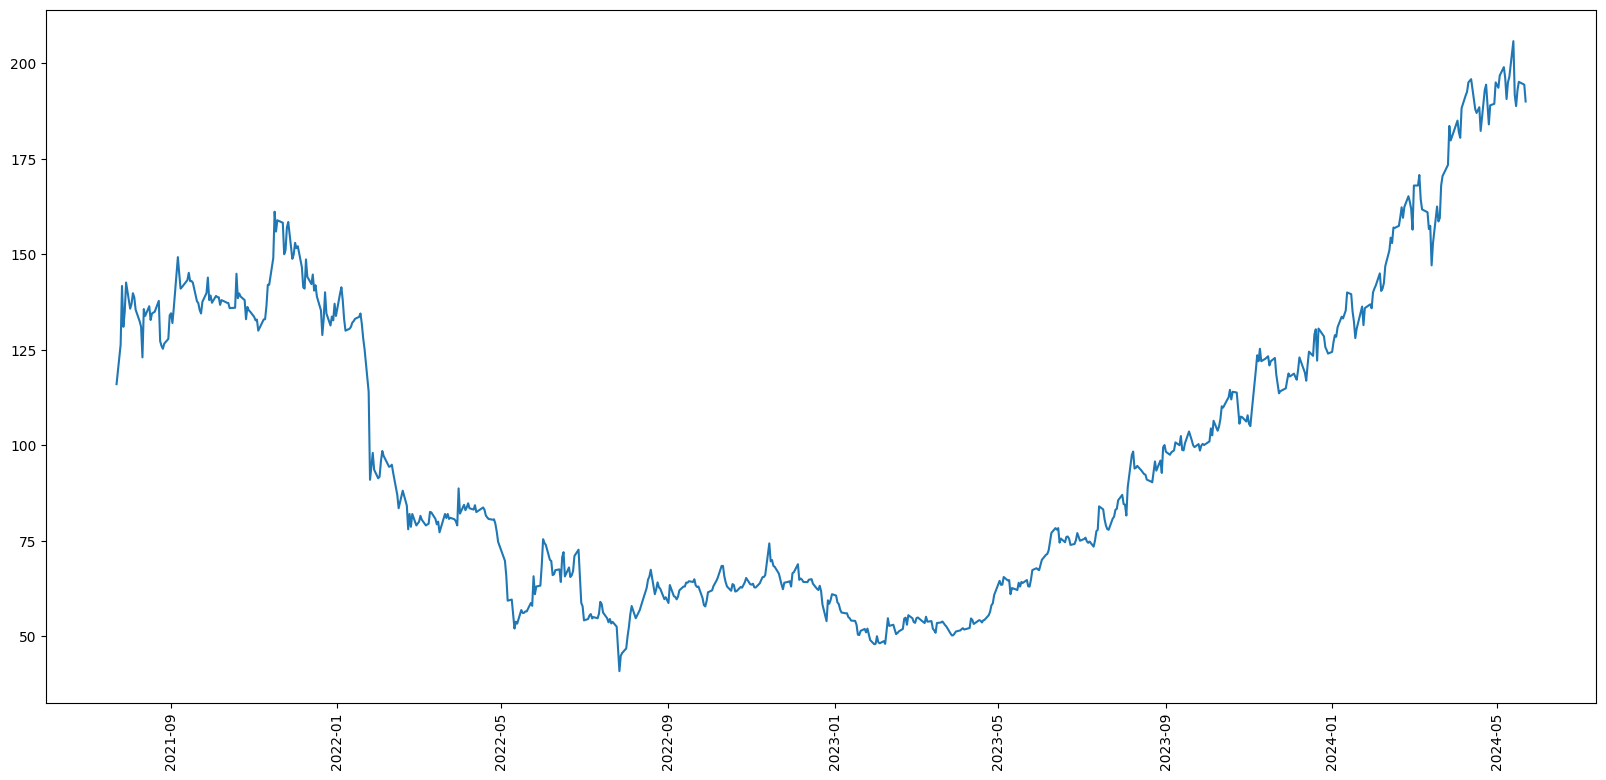

In [132]:
y = df["Open"]
print(y)

x = df["Date"]
print(x)

plt.figure(figsize=(20, 9))
plt.plot(x, y)
#plt.xlabel("Date")
#plt.ylabel("Opening Prices")
plt.xticks(rotation = 90)
plt.show()

PLOTING FOR LOW PRICES

0      115.000000
1      125.300003
2      127.750000
3      123.550003
4      132.199997
          ...    
693    183.149994
694    189.000000
695    193.100006
696    188.750000
697    183.350006
Name: Low, Length: 698, dtype: float64
0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


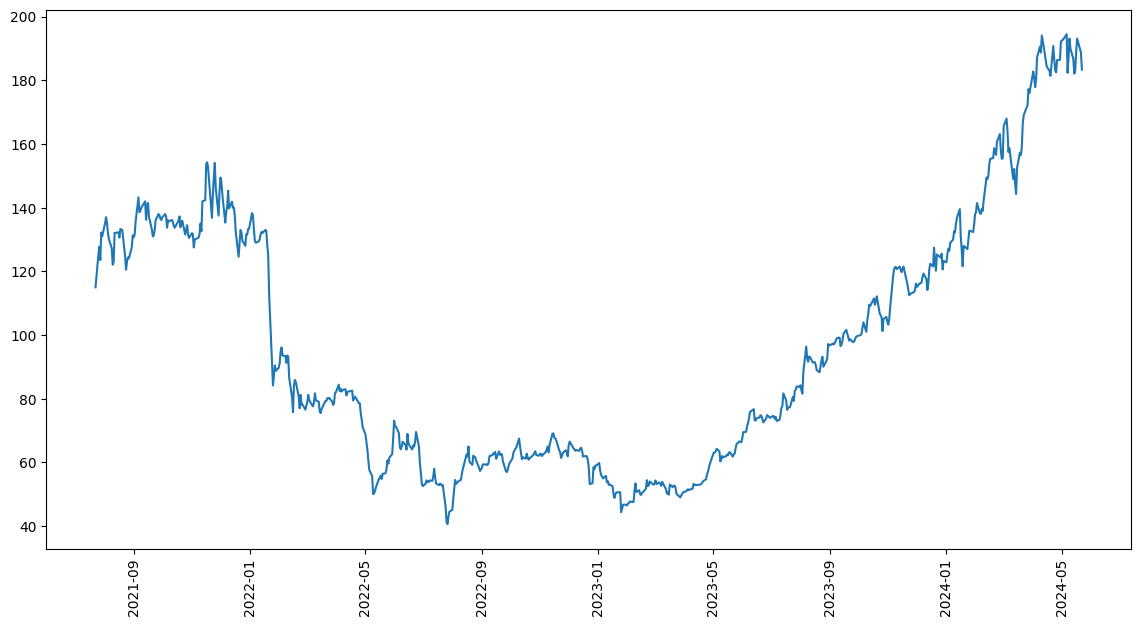

In [133]:
y = df["Low"]
print(y)
x = df["Date"]
print(x)
plt.figure(figsize=(14,7))
plt.plot(x,y)
#plt.xlabel('DATE')
#plt.ylabel('Low Prices')
plt.xticks(rotation=90)
plt.show()

PLOTING FOR HIGH PRICES

0      138.899994
1      143.750000
2      147.800003
3      135.000000
4      144.000000
          ...    
693    193.399994
694    195.850006
695    196.000000
696    196.500000
697    190.000000
Name: High, Length: 698, dtype: float64
0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


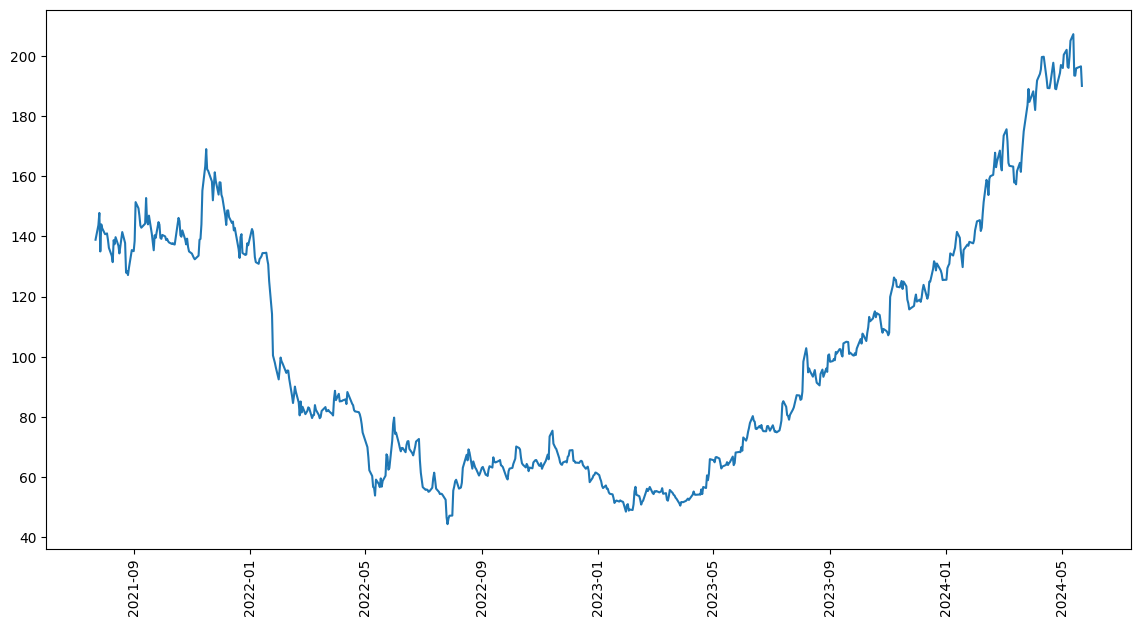

In [134]:
y = df['High']
print(y)
x= df['Date']
print(x)
plt.figure(figsize=(14,7))
plt.plot(x,y)
plt.xticks(rotation=90)
plt.show()

TIME SERIEAL PLOT

0      126.000000
1      140.649994
2      132.899994
3      131.199997
4      141.550003
          ...    
693    192.000000
694    195.199997
695    194.850006
696    189.100006
697    185.500000
Name: Close, Length: 698, dtype: float64
0     2021-07-23
1     2021-07-26
2     2021-07-27
3     2021-07-28
4     2021-07-29
         ...    
693   2024-05-15
694   2024-05-16
695   2024-05-17
696   2024-05-21
697   2024-05-22
Name: Date, Length: 698, dtype: datetime64[ns]


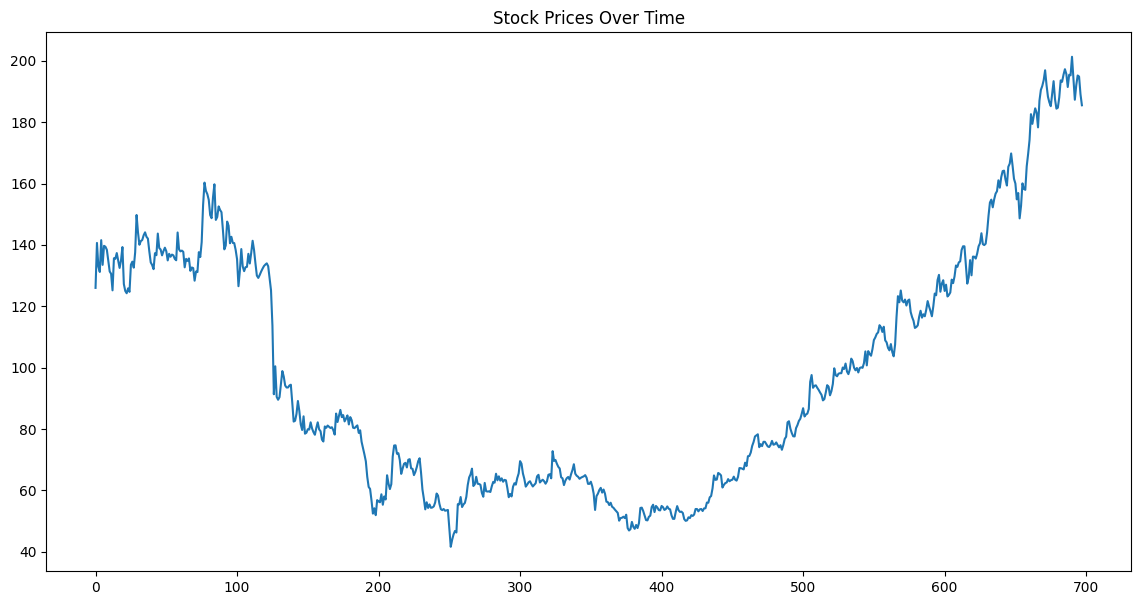

In [135]:
y= df['Close']
print(y)
x = df['Date']
print(x)
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'])
plt.title('Stock Prices Over Time')
##plt.xlabel('Date')
#plt.ylabel('Price')
plt.show()

PLOTING FOR MOVING AVERAGE

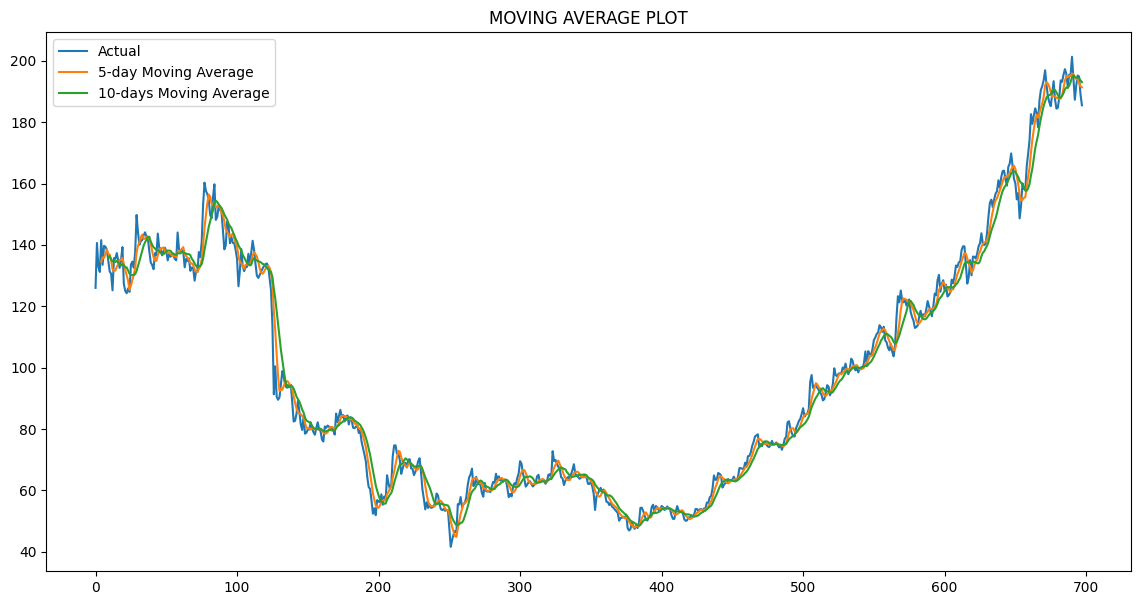

In [136]:
 #moving avrg
plt.figure(figsize=(14,7))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(df.index, df['Close'].rolling(window=5).mean(), label ='5-day Moving Average')
plt.plot(df.index, df['Close'].rolling(window=10).mean(), label ='10-days Moving Average')
plt.title('MOVING AVERAGE PLOT')
#plt.xlabel('DATE')
#plt.ylabel('PRICE')
plt.legend()
plt.show()



AUTOCORRELATION PLOTTING

<Figure size 1400x700 with 0 Axes>

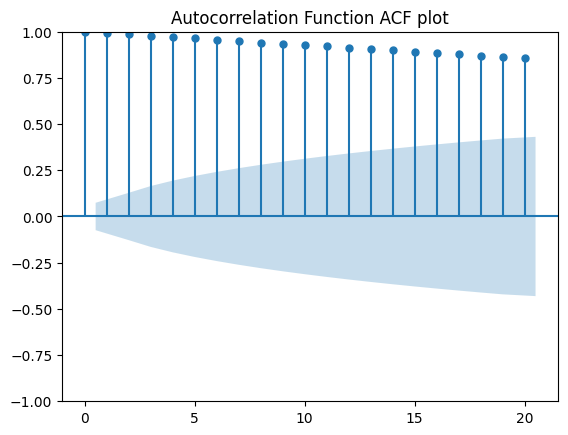

In [137]:
#ACF
plt.figure(figsize=(14,7))
plot_acf(df['Close'], lags=20)
plt.title('Autocorrelation Function ACF plot')
plt.show()

Partial Autocorrelation Function (PACF) Plot

<Figure size 1000x600 with 0 Axes>

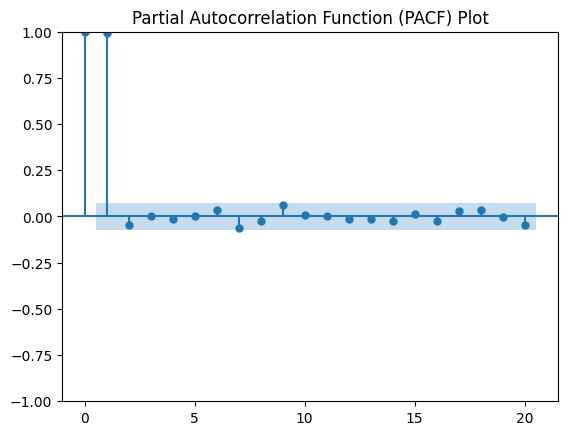

In [138]:
plt.figure(figsize=(10,6))
plot_pacf(df['Close'], lags=20)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

PLOTTING FOR START_DATE TO END_DATE

In [160]:

# Define the start and end dates for filtering
start_date = ' 2021-07-01'  # Change this to your desired start date
end_date = '2021-07-15'     # Change this to your desired end date

# Filter the data for the specified date range
filtered_data = df.loc[start_date:end_date]

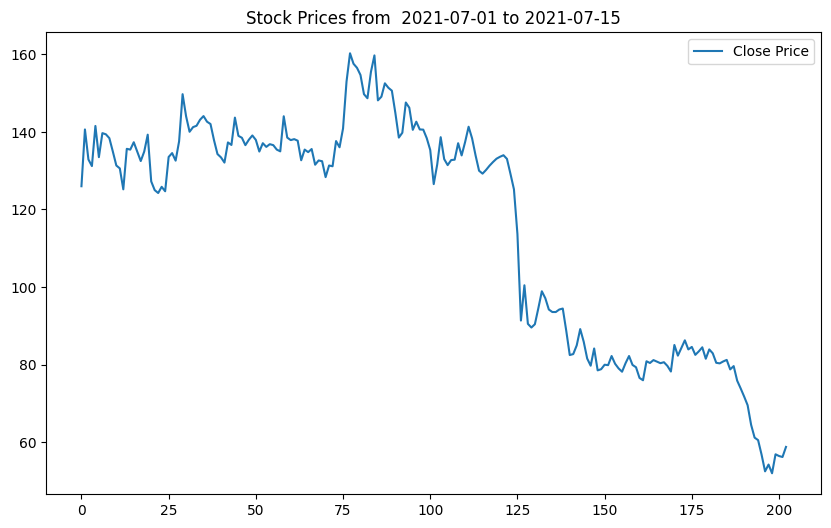

In [167]:
# Plot 1: Time Series Plot
plt.figure(figsize=(10, 6))
plt.plot(filtered_data.index, filtered_data['Close'], label='Close Price')
plt.title('Stock Prices from {} to {}'.format(start_date, end_date))
#plt.xlabel('Date')
#plt.ylabel('Price')
plt.legend()
plt.show()

model = ARIMA(filtered_data['Close'], order=(5, 1, 0))
model_fit = model.fit()
